<a href="https://colab.research.google.com/github/ProfKaromo/Data_Science_Codes/blob/main/Clustrering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Refs: https://scikit-learn.org/stable/
# Clustering is taking (n)-observations and group into (k) clusters
# Clustering is unsupervised Learning since data is not labeled, No response variable Y
import pandas
data = pandas.read_csv("https://modcom.co.ke/data/datasets/AirlinesCluster.csv")
data

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


In [2]:
data.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [3]:
data.corr()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
Balance,1.000000,0.108722,0.403487,0.324935,0.217551,0.255700,0.263129
QualMiles,0.108722,1.000000,0.031021,0.050725,0.126774,0.144004,0.017312
BonusMiles,0.403487,0.031021,1.000000,0.603180,0.183536,0.185261,0.210397
BonusTrans,0.324935,0.050725,0.603180,1.000000,0.377216,0.432364,0.161262
FlightMiles,0.217551,0.126774,0.183536,0.377216,1.000000,0.869193,0.037271
FlightTrans,0.255700,0.144004,0.185261,0.432364,0.869193,1.000000,0.059260
DaysSinceEnroll,0.263129,0.017312,0.210397,0.161262,0.037271,0.059260,1.000000


In [4]:
# Step 1: Split to X - independent variables
array = data.values
X = array[:, 4:7]  # 7 is not counted,  FlightMiles	FlightTrans	DaysSinceEnroll

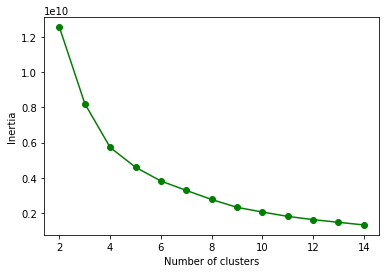

In [5]:
from sklearn.cluster import KMeans
# How many clusters are you looking at?
# Cross Validating using Elbow method
inertias = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)


import matplotlib.pyplot as plt
plt.plot(range(2,15), inertias, "o-g")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [6]:
# Step 2: Fit data to model specifying number of clusters
model = KMeans(n_clusters=12, random_state=42)
model.fit(X)
# Model Learning at this point

KMeans(n_clusters=12, random_state=42)

In [7]:
# Step 3: Get clusters
centronoids = model.cluster_centers_
clusters = pandas.DataFrame(centronoids, columns = ['FlightMiles',	'FlightTrans'	, 'DaysSinceEnroll'])
clusters

,FlightMiles,FlightTrans,DaysSinceEnroll
0,145.295265,0.537604,4677.601671
1,142.395349,0.549932,2105.266758
2,6482.583333,16.916667,6235.361111
3,2434.791304,7.104348,4676.391304
4,137.848718,0.502564,7541.487179
5,26458.500000,49.000000,2602.000000
6,129.988201,0.513274,3406.280236
7,3501.193548,9.236559,2154.322581
8,89.918415,0.356643,1010.156177
9,2267.833333,7.562500,7076.750000


In [8]:
# Step 4: Lets see who is in this Group?
data['label'] = model.labels_
data

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,label
0,28143,0,174,1,0,0,7000,4
1,19244,0,215,2,0,0,6968,4
2,41354,0,4123,4,0,0,7034,4
3,14776,0,500,1,0,0,6952,4
4,97752,0,43300,26,2077,4,6935,9
...,...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403,8
3995,64385,0,981,5,0,0,1395,8
3996,73597,0,25447,8,0,0,1402,8
3997,54899,0,500,1,500,1,1401,8


In [9]:
cluster4 = data[data['label']==7]
cluster4

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,label
2113,145233,0,9366,5,4866,3,2626,7
2199,77965,0,41126,33,2683,7,3120,7
2225,25788,0,4650,13,4650,13,3687,7
2250,65904,0,47224,35,5350,18,3655,7
2413,190674,4704,104159,33,4754,15,3396,7
...,...,...,...,...,...,...,...,...
3904,11974,0,4025,12,2400,6,1565,7
3907,126490,0,8808,15,5183,12,1566,7
3911,55922,2273,8104,19,4104,16,1552,7
3917,130748,0,65510,37,6349,7,1545,7


In [10]:
cluster9 = data[data['label']==9]
cluster9.to_csv('cluster9.csv')